# HW 2 INF 552
### Name: Siddhant Nadkarni
### USC ID: 2596-6618-89

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy.io import arff
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [80]:
def scatterPlotSNS(dataframe):
    g = sns.pairplot(dataframe)

### Q 1 (a)

In [81]:
dataPath = '../Homework2_Data/CCPP/Folds5x2_pp.xlsx'

In [82]:
df = pd.read_excel(dataPath)

In [83]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Q 1 (b) i. Number of Rows and Columns

In [84]:
numCols = df.shape[1]
numRows = df.shape[0]
print("The no. of cols is: {}".format(numCols))
print("The no. of rows is: {}".format(numRows))

The no. of cols is: 5
The no. of rows is: 9568


### The first 4 columns represent features / predictors / independent variables i.e. Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) of a power plant Cycle over 6 years

### The fifth column represents dependent variable net hourly electrical energy output (EP) of the plant over the same period

### The rows represents instances/ data points of each independent / dependent variable 

### Q 1 (b) ii. Scatter Plot

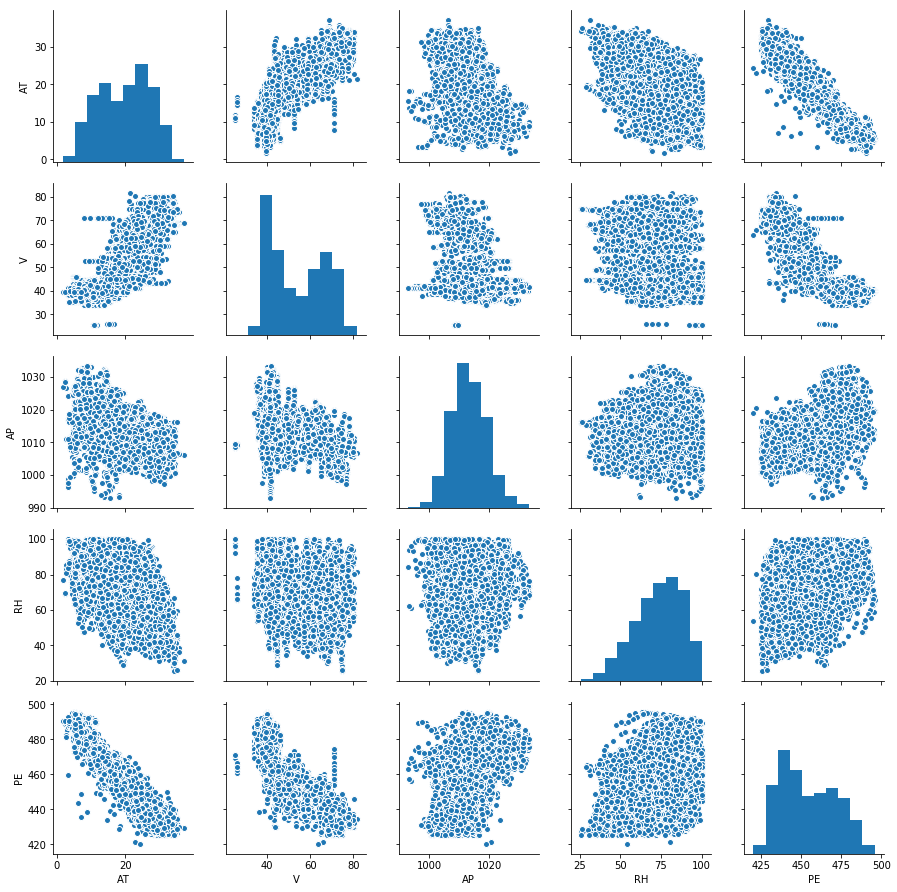

In [85]:
scatterPlotSNS(df)

### Findings: From the above scatter plots of independent variables vs dependent variable we see that there is clear negative correlation between AT and PE,  V and PE (to some extent) and positive correlation between V and AT

In [86]:
for i in range(len(df.columns)):
    print("For column {}".format(df.columns[i]))
    print("Range is: {}".format((df.max() - df.min())[i]))
    print("Mean is: {}".format(df.mean()[i]))
    print("Median is: {}".format(df.median()[i]))
    print("Quantile at 25% is: {}".format(df.quantile(q = 0.25)[i]))
    print("Quantile at 75% is: {}".format(df.quantile(q = 0.75)[i]))
    print("Interquatile range is: {}".format(df.quantile(q = 0.75)[i] - df.quantile(q = 0.25)[i]))
    print("     ")

For column AT
Range is: 35.3
Mean is: 19.65123118729102
Median is: 20.345
Quantile at 25% is: 13.51
Quantile at 75% is: 25.72
Interquatile range is: 12.209999999999999
     
For column V
Range is: 56.2
Mean is: 54.30580372073601
Median is: 52.08
Quantile at 25% is: 41.74
Quantile at 75% is: 66.54
Interquatile range is: 24.800000000000004
     
For column AP
Range is: 40.40999999999997
Mean is: 1013.2590781772603
Median is: 1012.94
Quantile at 25% is: 1009.1
Quantile at 75% is: 1017.26
Interquatile range is: 8.159999999999968
     
For column RH
Range is: 74.6
Mean is: 73.30897784280926
Median is: 74.975
Quantile at 25% is: 63.3275
Quantile at 75% is: 84.83
Interquatile range is: 21.502499999999998
     
For column PE
Range is: 75.5
Mean is: 454.3650094063554
Median is: 451.54999999999995
Quantile at 25% is: 439.75
Quantile at 75% is: 468.43
Interquatile range is: 28.680000000000007
     


In [87]:
# Divide independent and dependent variables as X and y respectively
X = df[df.columns[0:4]]
y = df[df.columns[4]]

In [88]:
# Add intercept to independent variable X
X['intercept'] = np.ones(X.shape[0])

In [89]:
X.head()

,AT,V,AP,RH,intercept
0,14.96,41.76,1024.07,73.17,1.0
1,25.18,62.96,1020.04,59.08,1.0
2,5.11,39.40,1012.16,92.14,1.0
3,20.86,57.32,1010.24,76.64,1.0
4,10.82,37.50,1009.23,96.62,1.0


In [90]:
y.head()

0    463.26
1    444.37
2    488.56
3    446.48
4    473.90
Name: PE, dtype: float64

In [91]:
# Split X and y to train (80%) and test(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Separate independent variables
col1 = list(X_train[X_train.columns[0]])
col2 = list(X_train[X_train.columns[1]])
col3 = list(X_train[X_train.columns[2]])
col4 = list(X_train[X_train.columns[3]])

y_train = list(y_train)

In [93]:
# Some utility functions
def performRegression(columnsIndex):
    model = sm.OLS(y_train, X_train[[X_train.columns[columnsIndex], X_train.columns[4]]])
    results = model.fit()
    sm.graphics.plot_fit(results,0)
    print(results.summary())
    
def performNonLinearRegression(columnsIndex):
    var_x = X_train[X_train.columns[columnsIndex]]
    var_x_sq = (var_x)**2
    var_x_cu = (var_x)**3
    var_x_df = pd.DataFrame()
    var_x_df['var_x'] = var_x
    var_x_df['var_x_sq'] = var_x_sq
    var_x_df['var_x_cu'] = var_x_cu
    var_x_df['intercept'] = np.ones(var_x.shape[0])
    model = sm.OLS(y_train, var_x_df)
    results = model.fit()
    sm.graphics.plot_fit(results,0)
    print(results.summary())

def computeError(y_actual, y_pred):
    return (np.sum(abs(y_actual - y_pred))/len(y_actual))

def performPairWiseLinearRegression(columnsIndex1, columnsIndex2):
    X_new = X_train.copy()
    X_new[('{} x {}').format(X_train.columns[columnsIndex1], X_train.columns[columnsIndex2])] = X_train[X_train.columns[columnsIndex1]]*X_train[X_train.columns[columnsIndex2]]
    model = sm.OLS(y_train, X_new)
    results = model.fit()
    sm.graphics.plot_fit(results,0)
    print(results.summary())
    
def nonLinearInteractiveRegression(X, y):
    X_new = X.copy()
    for i in range(4):
        for j in range(i,4):
            X_new[('{} x {}').format(X.columns[i], X.columns[j])] = X[X.columns[i]]*X[X.columns[j]]
    X_new['intercept'] = np.ones(X_new.shape[0])
    model = sm.OLS(y, X_new)
    results = model.fit()
    sm.graphics.plot_fit(results,0)
    print(results.summary())
    return X_new

def getOnlyInteractivePreds(columnIndex1, columnIndex2, X, X_train):
    X[('{} x {}').format(X_train.columns[columnIndex1], X_train.columns[columnIndex2])] = X_train[X_train.columns[columnIndex1]]*X_train[X_train.columns[columnIndex2]]
    
def performRegressionFull(y, X):
    model = sm.OLS(y, X)
    results = model.fit()
    y_pred = results.predict(X)
    sm.graphics.plot_fit(results,0)
    print(results.summary())
    return y_pred

def getBestPreds(X):
    X_new = pd.DataFrame()
    X_new = X.copy()
    X_new = X_new.drop(columns = ['V x RH','V x V','V x AP'])
    return X_new
    

### Q 1 (c)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 6.780e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:33   Log-Likelihood:                -23821.
No. Observations:                7654   AIC:                         4.765e+04
Df Residuals:                    7652   BIC:                         4.766e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.1771      0.008   -260.392      0.0

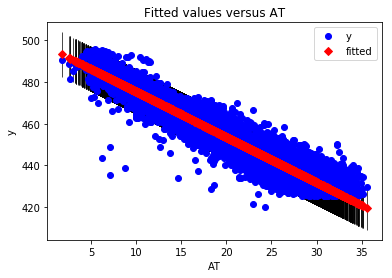

In [94]:
# Perform regression for column[0] = Temperature
performRegression(0)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.370e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:34   Log-Likelihood:                -27182.
No. Observations:                7654   AIC:                         5.437e+04
Df Residuals:                    7652   BIC:                         5.438e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V             -1.1681      0.008   -153.953      0.0

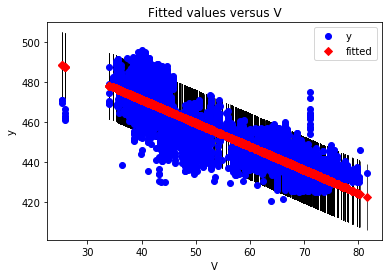

In [95]:
# Perform regression for column[1] = Exhaust Vacuum
performRegression(1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     2817.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:34   Log-Likelihood:                -31380.
No. Observations:                7654   AIC:                         6.276e+04
Df Residuals:                    7652   BIC:                         6.278e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AP             1.4898      0.028     53.073      0.0

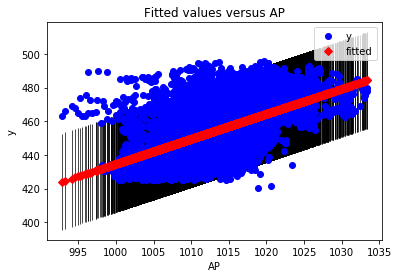

In [96]:
# Perform regression for column[2] = Ambient Pressure
performRegression(2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1371.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):          4.09e-276
Time:                        23:08:35   Log-Likelihood:                -31949.
No. Observations:                7654   AIC:                         6.390e+04
Df Residuals:                    7652   BIC:                         6.392e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH             0.4551      0.012     37.020      0.0

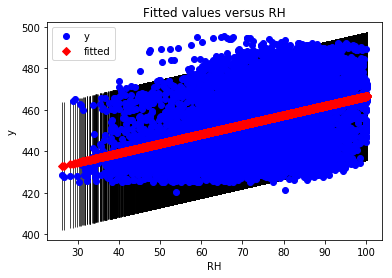

In [97]:
# Perform regression for column[3] = Relative Humidity
performRegression(3)

### From the above graphs and statistical analysis we can see that there is a clear negative correlation between AT and PE and also between V and PE. There are outliers in PE vs AT especially with low AT values which we would like to get rid off.

### The R -  squared value, which is a statistical measure of how close the data are fitted to regression line, is high between AT and PE and V and PE. 

### The other two graphs, PE vs AP and PE vs RH we can see that there is a slight positive correlation but it seems mostly insignificant because data is spread out and there is not adequate line fitting this data. The R - squared value is also high.

-----


### Q 1(d)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.477e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:36   Log-Likelihood:                -22492.
No. Observations:                7654   AIC:                         4.499e+04
Df Residuals:                    7649   BIC:                         4.503e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9859      0.017   -115.712      0.0

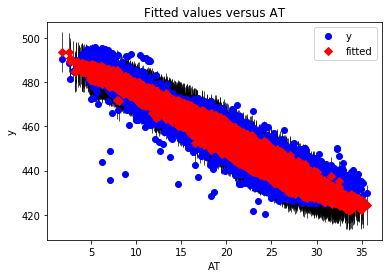

In [98]:
# Perform regression for all independent variables together
model = sm.OLS(y_train, X_train)
results = model.fit()
sm.graphics.plot_fit(results,0)

print(results.summary())

### We can reject null hypothesis for all predictors because their all of their p values are very low indicating significance

### Q 1 (e) Multivariate vs Univariate Regression Coefficients Plot

Text(0.5, 1.0, 'Multivariate vs Univariate Regression Coefficients')

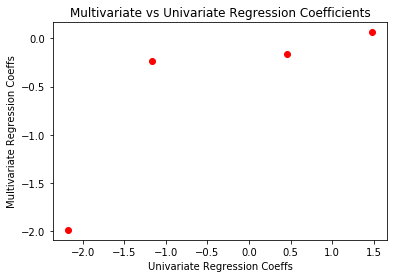

In [99]:
x_coeffs = [-2.1771, -1.1681, 1.48, 0.4551]
y_coeffs =[-1.9859, -0.2321, 0.0622, -0.1581]
plt.plot(x_coeffs, y_coeffs, 'ro')
plt.xlabel('Univariate Regression Coeffs')
plt.ylabel('Multivariate Regression Coeffs')
plt.title('Multivariate vs Univariate Regression Coefficients')

### Q1(f)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 2.627e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:37   Log-Likelihood:                -23299.
No. Observations:                7654   AIC:                         4.661e+04
Df Residuals:                    7650   BIC:                         4.663e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_x         -0.6658      0.140     -4.752      0.0

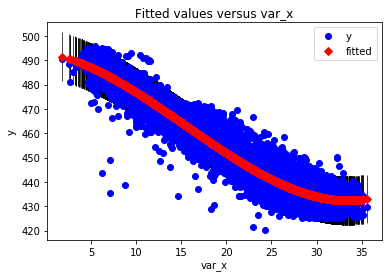

In [100]:
# Perform non linear regression for column[0] = AT
performNonLinearRegression(0)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     8850.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:38   Log-Likelihood:                -26848.
No. Observations:                7654   AIC:                         5.370e+04
Df Residuals:                    7650   BIC:                         5.373e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_x         -3.2170      0.590     -5.457      0.0

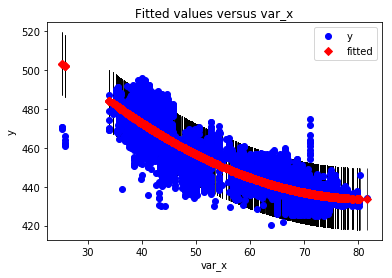

In [101]:
# Perform non linear regression for column[1] = V
performNonLinearRegression(1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     1446.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:38   Log-Likelihood:                -31352.
No. Observations:                7654   AIC:                         6.271e+04
Df Residuals:                    7651   BIC:                         6.273e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_x         23.2314      3.354      6.926      0.0

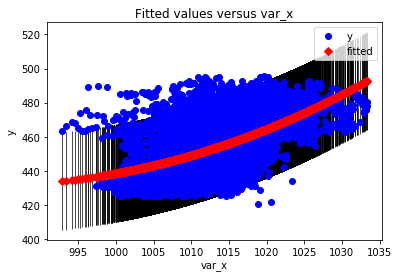

In [102]:
# Perform non linear regression for column[2] = AP
performNonLinearRegression(2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     464.0
Date:                Thu, 26 Sep 2019   Prob (F-statistic):          5.49e-277
Time:                        23:08:39   Log-Likelihood:                -31940.
No. Observations:                7654   AIC:                         6.389e+04
Df Residuals:                    7650   BIC:                         6.391e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_x         -1.8746      0.545     -3.438      0.0

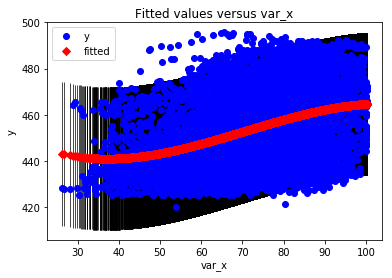

In [103]:
# Perform non linear regression for column[3] = RH
performNonLinearRegression(3)

### Yes there is relation between  non linear predictors and responses ( for X = AT)

### Q 1 (g)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 2.187e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:40   Log-Likelihood:                -22140.
No. Observations:                7654   AIC:                         4.429e+04
Df Residuals:                    7648   BIC:                         4.433e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.9082      0.038    -77.111      0.0

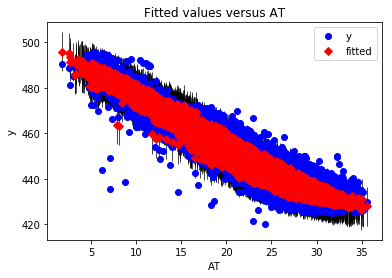

In [104]:
# Perform pairwise linear regression for = AT x V
performPairWiseLinearRegression(0,1)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.984e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:41   Log-Likelihood:                -22488.
No. Observations:                7654   AIC:                         4.499e+04
Df Residuals:                    7648   BIC:                         4.503e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT             1.6477      1.257      1.311      0.1

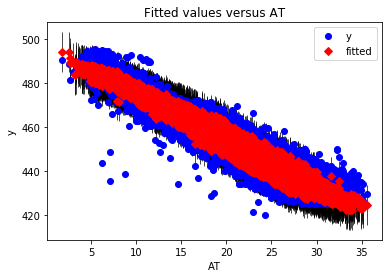

In [105]:
# Perform pairwise linear regression for = AT x AP
performPairWiseLinearRegression(0,2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 2.093e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:41   Log-Likelihood:                -22298.
No. Observations:                7654   AIC:                         4.461e+04
Df Residuals:                    7648   BIC:                         4.465e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.2719      0.039    -32.211      0.0

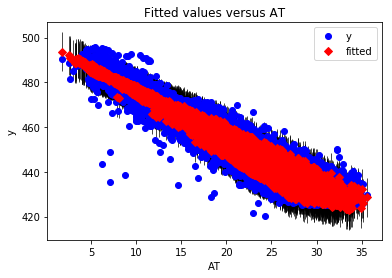

In [106]:
# Perform pairwise linear regression for = AT x RH
performPairWiseLinearRegression(0,3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.983e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:42   Log-Likelihood:                -22490.
No. Observations:                7654   AIC:                         4.499e+04
Df Residuals:                    7648   BIC:                         4.503e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9832      0.017   -115.277      0.0

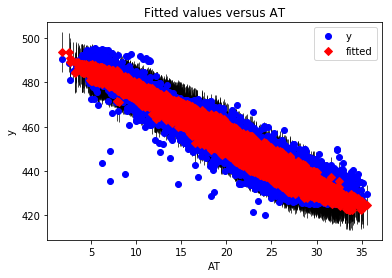

In [107]:
# Perform pairwise linear regression for = V x AP
performPairWiseLinearRegression(1,2)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 2.092e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:43   Log-Likelihood:                -22298.
No. Observations:                7654   AIC:                         4.461e+04
Df Residuals:                    7648   BIC:                         4.465e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9842      0.017   -118.570      0.0

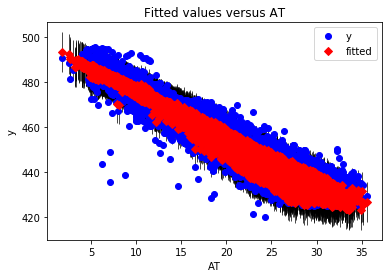

In [108]:
# Perform pairwise linear regression for = V x RH
performPairWiseLinearRegression(1,3)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.986e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:43   Log-Likelihood:                -22483.
No. Observations:                7654   AIC:                         4.498e+04
Df Residuals:                    7648   BIC:                         4.502e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9928      0.017   -115.737      0.0

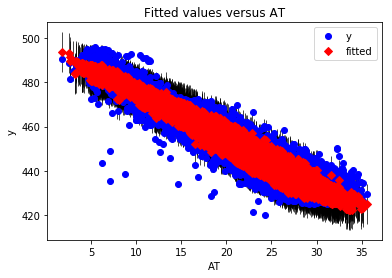

In [109]:
# Perform pairwise linear regression for = AP x RH
performPairWiseLinearRegression(2,3)

### From the above statistical analysis we can see that there is interactions of pairwise predictors and responses

### Q 1 (h)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     8214.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:44   Log-Likelihood:                -21956.
No. Observations:                7654   AIC:                         4.394e+04
Df Residuals:                    7639   BIC:                         4.405e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -5.8537      3.458     -1.693      0.0

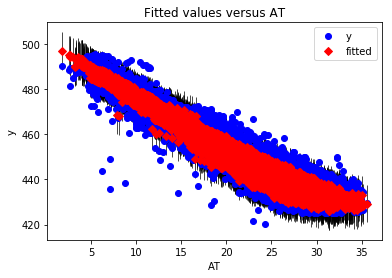

In [110]:
X_best = nonLinearInteractiveRegression(X_train, y_train)

### Above we can see interactions between all types of predictors i.e. pairwise, squared variables with responses. Looking at the p values we can see p values of AT x AP, V x V and V x RH are quite large. Thus they are insignificant in comparision to the rest and thus drop them 


In [111]:
# Droping the insignificant predictors, we get the best predictors.
X_new = getBestPreds(X_best)
X_new.head()

,AT,V,AP,RH,intercept,AT x AT,AT x V,AT x AP,AT x RH,AP x AP,AP x RH,RH x RH
5487,21.92,49.02,1009.29,88.56,1.0,480.4864,1074.5184,22123.6368,1941.2352,1.018666e+06,89382.7224,7842.8736
3522,11.09,40.43,1025.47,74.97,1.0,122.9881,448.3687,11372.4623,831.4173,1.051589e+06,76879.4859,5620.5009
6916,8.49,39.61,1021.05,87.74,1.0,72.0801,336.2889,8668.7145,744.9126,1.042543e+06,89586.9270,7698.3076
7544,11.43,44.78,1013.43,82.45,1.0,130.6449,511.8354,11583.5049,942.4035,1.027040e+06,83557.3035,6798.0025
7600,17.28,39.99,1007.09,74.25,1.0,298.5984,691.0272,17402.5152,1283.0400,1.014230e+06,74776.4325,5513.0625


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     2077.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:44   Log-Likelihood:                -5470.2
No. Observations:                1914   AIC:                         1.097e+04
Df Residuals:                    1899   BIC:                         1.105e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -4.7239      6.949     -0.680      0.4

,AT,V,AP,RH,intercept,AT x AT,AT x V,AT x AP,AT x RH,AP x AP,AP x RH,RH x RH
2513,19.64,48.06,1014.81,74.96,1.0,385.7296,943.8984,19930.8684,1472.2144,1.029839e+06,76070.1576,5619.0016
9411,28.26,69.23,1013.01,42.10,1.0,798.6276,1956.4398,28627.6626,1189.7460,1.026189e+06,42647.7210,1772.4100
8745,27.98,67.17,1007.32,75.29,1.0,782.8804,1879.4166,28184.8136,2106.6142,1.014694e+06,75841.1228,5668.5841
9085,28.64,69.23,1013.11,37.13,1.0,820.2496,1982.7472,29015.4704,1063.4032,1.026392e+06,37616.7743,1378.6369
4950,9.34,38.08,1019.56,67.74,1.0,87.2356,355.6672,9522.6904,632.6916,1.039503e+06,69064.9944,4588.7076


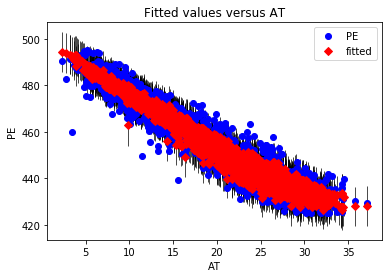

In [112]:
# Doing regression for all posssible pairwise and non linear predictors 
# for test data and Droping the insignificant predictors, we get the best test predictors.
X_best_test = nonLinearInteractiveRegression(X_test, y_test)
X_new_test = getBestPreds(X_best_test)
X_new_test.head()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.045e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:45   Log-Likelihood:                -21957.
No. Observations:                7654   AIC:                         4.394e+04
Df Residuals:                    7642   BIC:                         4.402e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -9.5495      2.186     -4.368      0.0

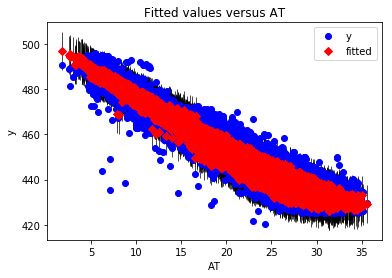

In [113]:
# y_train predictions on this model
y_train_pred = performRegressionFull(y_train, X_new)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     2640.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        23:08:46   Log-Likelihood:                -5473.0
No. Observations:                1914   AIC:                         1.097e+04
Df Residuals:                    1902   BIC:                         1.104e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT           -12.2750      4.334     -2.833      0.0

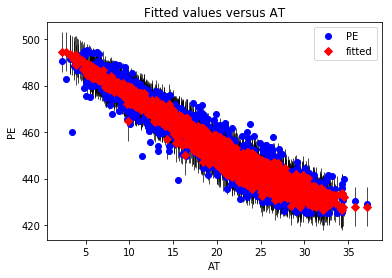

In [114]:
# y_test predictions on this model
y_test_pred = performRegressionFull(y_test, X_new_test)

### MSE for train and test

In [115]:
# MSE for Train
mean_squared_error(y_train_pred, y_train)

18.165295946541114

In [116]:
# MSE for Test
mean_squared_error(y_test_pred, y_test)

17.831935570480432

### Q (i) i. KNN Regression 

In [117]:
listK = []
train_errors = []
test_errors = []
k_dict = {}
inverse_k =[]
for k in range(1, 101, 1):
    knn = KNeighborsRegressor(n_neighbors = k, p = 2)
    knn.fit(X_train, y_train)
    y_test_predicted = knn.predict(X_test)
    y_train_predicted = knn.predict(X_train)
    k_dict[k] = np.float128(computeError(y_test_predicted, y_test))
    train_errors.append(computeError(y_train_predicted, y_train))
    test_errors.append(computeError(y_test_predicted, y_test))
    inverse_k.append(1/k)
print("Best training error: {}".format(np.amin(train_errors)))
print("Best testing error: {}".format(np.amin(test_errors)))

Best training error: 0.0
Best testing error: 2.860811128526646


### Value of K that gives best fit:

In [118]:
best_k = min(k_dict.keys(), key = (lambda k: k_dict[k]))
best_k

4

### Plot of Train and Test error vs inverse K

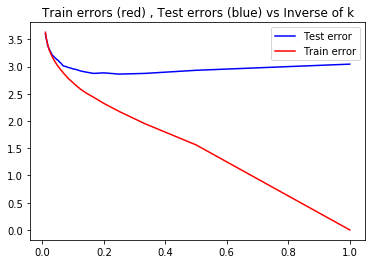

In [119]:
plt.plot(inverse_k, test_errors, 'b-')
plt.plot(inverse_k, train_errors, 'r-')
plt.gca().legend(('Test error', 'Train error'))
plt.title('Train errors (red) , Test errors (blue) vs Inverse of k')
plt.show()

### KNN Performs better than Linear regression because it more flexible and thus can fit the data better as data has large number of samples and few predictors (only 5). Thus KNN is able to model the data correctly giving both train and test errors lower than that of the best regression model

### ISLR 2.4.1 and 2.4.7 are attached in a separate PDF.